In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)


In [2]:
import pandas as pd
from pandas import DataFrame

# Yalnızca bir kere patch et
if not hasattr(DataFrame, "_orig_repr_html_"):
    DataFrame._orig_repr_html_ = DataFrame._repr_html_

    def _scrollable_repr_html(self):
        html = DataFrame._orig_repr_html_(self)  # sınıftaki orijinale sabitle
        return (
            '<div style="width:100%; height:400px; overflow:auto; '
            'border:1px solid #eee; border-radius:8px; padding:8px;">'
            f'{html}</div>'
        )

    DataFrame._repr_html_ = _scrollable_repr_html

### Sipariş Verisi

#### Yıllık Tüfe Verisi

In [3]:
tüfe=pd.read_excel("Başlıksız e-tablo.xlsx")
tüfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ds           91 non-null     datetime64[ns]
 1   tüfe yıllık  91 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.6+ KB


In [4]:
tüfe

,ds,tüfe yıllık
0,2025-07-01,33.52
1,2025-06-01,35.05
2,2025-05-01,35.41
3,2025-04-01,37.86
4,2025-03-01,38.10
...,...,...
86,2018-05-01,12.15
87,2018-04-01,10.85
88,2018-03-01,10.23
89,2018-02-01,10.26


In [5]:
tüfe["ds"]=pd.to_datetime(tüfe["ds"])
tüfe["ds"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 91 entries, 0 to 90
Series name: ds
Non-Null Count  Dtype         
--------------  -----         
91 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 860.0 bytes


#### USD_TRY Geçmiş Veriler

In [6]:
dolar=pd.read_csv("USD_TRY Geçmiş Verileri (1).xls")
dolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tarih   1980 non-null   object 
 1   Şimdi   1980 non-null   object 
 2   Açılış  1980 non-null   object 
 3   Yüksek  1980 non-null   object 
 4   Düşük   1980 non-null   object 
 5   Hac.    0 non-null      float64
 6   Fark %  1980 non-null   object 
dtypes: float64(1), object(6)
memory usage: 108.4+ KB


In [7]:
dolar["Tarih"]=pd.to_datetime(dolar["Tarih"])
dolar["Tarih"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1980 entries, 0 to 1979
Series name: Tarih
Non-Null Count  Dtype         
--------------  -----         
1980 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 15.6 KB


C:\Users\Asus\AppData\Local\Temp\ipykernel_24640\1386394435.py:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dolar["Tarih"]=pd.to_datetime(dolar["Tarih"])


In [8]:
otob_kampanya=pd.read_excel("Yurt içi kampanya otobüs satış (1).xlsx",skiprows=6)

In [9]:
otob_kampanya = otob_kampanya.dropna(how="all")


In [10]:
otob_kampanya

,Müşteri,KşTü,Koşul türü,Unnamed: 3,Unnamed: 4,Malzeme,Malzeme.1,Tutar,Birim,Brm.,ÖB,Bşl.tarihi,Gçrl.sonu,Müşteri adı
2,600017.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,0734-317-276,YAG TUTUCU,-2.0,%,NaN,NaN,2021-09-30,2021-09-30 00:00:00,ARAZ OTOMOTİV SAN. VE TİC. LTD.ŞTİ
3,600017.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,1001000000135Y,"RADYATOR,DEFROSTER",-7.0,%,NaN,NaN,2022-01-07,2022-01-10 00:00:00,ARAZ OTOMOTİV SAN. VE TİC. LTD.ŞTİ
4,600017.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,1001000000188Y,"AL.BRAZZING PETEK,DEFROSTER",-5.0,%,NaN,NaN,2022-01-07,2022-01-10 00:00:00,ARAZ OTOMOTİV SAN. VE TİC. LTD.ŞTİ
5,600017.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,11117856CY,"KLİMA SOĞUTMA HORTUMU,NW25 90/0 7,1/7,1",-27.8,%,NaN,NaN,2020-11-17,2020-11-17 00:00:00,ARAZ OTOMOTİV SAN. VE TİC. LTD.ŞTİ
6,600017.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,11117857CY,"KLİMA SOĞUTMA HORTUMU,NW25 90/0 7,1/7,1",-27.8,%,NaN,NaN,2020-11-17,2020-11-17 00:00:00,ARAZ OTOMOTİV SAN. VE TİC. LTD.ŞTİ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16704,10038718.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,525949900,YAG KECESI,-4.9,%,NaN,NaN,2024-02-20,2024-02-21 00:00:00,ÖZUÇURAN YEDEK PARÇA OTO ELEKTRİK İ
16705,10038718.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,NK113121,ARKA AMORTISOR (KONI),-4.5,%,NaN,NaN,2025-03-20,2025-03-21 00:00:00,ÖZUÇURAN YEDEK PARÇA OTO ELEKTRİK İ
16706,10038718.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,NK215100Y,SU DEVIR POMPASI,-4.0,%,NaN,NaN,2024-02-26,2024-02-27 00:00:00,ÖZUÇURAN YEDEK PARÇA OTO ELEKTRİK İ
16707,10038718.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,NK267179Y,GENLESME TANKI,-5.0,%,NaN,NaN,2023-09-21,2023-09-25 00:00:00,ÖZUÇURAN YEDEK PARÇA OTO ELEKTRİK İ


In [11]:
 df_otob = pd.read_csv(r"Partvision - Otobüs.csv")

C:\Users\Asus\AppData\Local\Temp\ipykernel_24640\4129637736.py:1: DtypeWarning: Columns (20,28,29,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df_otob = pd.read_csv(r"Partvision - Otobüs.csv")


In [97]:
 df_canter = pd.read_csv(r"Partvision - Canter - Sipariş no - Güncel.csv")
 df_otob = pd.read_csv(r"Partvision - Otobüs - Sipariş no_22_07_2025.csv")
 df_merged = pd.concat([df_canter, df_otob], ignore_index=True)
df_merged['Yaratma tarihi'] = pd.to_datetime(df_merged['Yaratma tarihi'], errors='coerce')
 df_merged = df_merged.sort_values(by='Yaratma tarihi', ascending=True).reset_index(drop=True)

 df_merged.to_csv("siparis_data_merged_22_07.csv", index=False)

C:\Users\drkgl\AppData\Local\Temp\ipykernel_12992\3847231742.py:1: DtypeWarning: Columns (20,28,29,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df_canter = pd.read_csv(r"Partvision - Canter - Sipariş no - Güncel.csv")


In [581]:
df = pd.read_csv(r"siparis_data_merged_22_07.csv")

In [5]:
df = df[[ "Satış organizasyonu", "Dağıtım kanalı", "Satış belgesi türü", "Satış belgesi", "Yaratma tarihi",  "Müşteri", "Malzeme", "Malzeme kısa metni", "Sipariş miktarı", "Orta. Bul", "Sipariş nedeni", "Ret nedeni","Sipariş Kriteri","Tedarik Türü", "Sonraki SD belgesi"]]

In [583]:
df

,Üretim yeri,Satış belgesi,Yaratma tarihi,İki basamaklı no.,Saat,Satış organizasyonu,Dağıtım kanalı,Bölüm,Kalem,Müşteri,Ad,Malzeme,Malzeme kısa metni,İlk Malzeme,Kaç defa değişti?,Fiyat grubu,Sipariş miktarı,Teyit edilen küm.mkt,Durum,Geliş Trh,Tahsis Tarihi,Tahsis Saati,İlk Dönem,Son Dönem,Unnamed: 24,Orta. Bul,Genel Bul.,Servis Drc,Son Tahsis Tarihi,Hesap Tarihi,Hesap Saati,Hesap Miktari,Satış belgesi türü,Sipariş nedeni,Ret nedeni,Araç tipi,Tedarik yeri,Sipariş Kriteri,Plnl.tsl.süresi,Tedarik Türü,Kayar ortalama fiyat,ÜY'ye özgü mlz.drm.,Sonraki SD belgesi
0,5000,1002763582,2018-06-30,6,03:06:52 PM,OTOB,BS,OY,50,800000,AKYÜZLER OTOMOTİV DIŞ,LF16519,YAĞ FİLTRESİ,LF16015VE,1,10.0,2.0,2.0,Normal,6/30/2018,NaN,12:00:00 AM,6.2018,6.2025,0,0.0,0.0,0.0,NaN,NaN,12:00:00 AM,0.0,WTEK,901,NaN,AVENUE E6,CUMMINS,B,0,I,0.0,NaN,NaN
1,5000,1002763575,2018-06-30,6,12:21:33 PM,OTOB,BS,OY,10,600241,BOLU AS OTOMOTİV TUR. NAK.,TM187142Y,HAVA KOMPRESORU,NaN,0,10.0,2.0,0.0,Normal,6/30/2018,NaN,12:00:00 AM,6.2018,6.2025,0,0.0,0.0,0.0,NaN,NaN,12:00:00 AM,0.0,WTEK,901,NaN,PRESTIJ E6,FILKAR,K,0,Y,0.0,NaN,NaN
2,5000,1002763576,2018-06-30,6,12:23:54 PM,OTOB,BS,OY,10,600030,BAYRAKTAR OTOMOTİV TİC VE SAN.LTD.,5668-LGP-01,"ARKA BLOK FAR,SAG,DG2010-8B,YENI",HD253129,1,10.0,1.0,1.0,Normal,6/30/2018,NaN,12:00:00 AM,6.2018,6.2025,0,0.0,0.0,0.0,NaN,NaN,12:00:00 AM,0.0,WTEK,901,NaN,MARATON,DANYANG,P,0,I,0.0,NaN,NaN
3,5000,1002763577,2018-06-30,6,12:28:14 PM,OTOB,BS,OY,10,600462,BREY OTOMOTİV SANAYİ TİCARET AŞ.,SB152162Y,KASA BADEMCIK BURCU,NaN,0,10.0,7.0,7.0,Normal,6/30/2018,NaN,12:00:00 AM,6.2018,6.2025,0,0.0,0.0,0.0,NaN,NaN,12:00:00 AM,0.0,WTEK,901,NaN,SAFIR V E6,REVAR,T,0,Y,0.0,NaN,NaN
4,5000,1002763577,2018-06-30,6,12:28:14 PM,OTOB,BS,OY,20,600462,BREY OTOMOTİV SANAYİ TİCARET AŞ.,CM113107Y,"A. AKS CIVATASI M20x1,5x350",NaN,0,10.0,20.0,20.0,Normal,6/30/2018,NaN,12:00:00 AM,6.2018,6.2025,0,0.0,0.0,0.0,NaN,NaN,12:00:00 AM,0.0,WTEK,901,NaN,METROP E4M,CVT,P,0,Y,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937361,4000,1002888558,2023-10-23,10,02:05:03 PM,MA00,YS,PY,10,600371,ÖZPAM OTOMOTİV PETROL LTD. ŞTİ.,MX915959,"LAMBA,KABIN USTU,SOL,GSR",NaN,0,10.0,1.0,1.0,Normal,10/23/2023,NaN,12:00:00 AM,6.2018,6.2025,0,0.0,0.0,0.0,NaN,NaN,12:00:00 AM,0.0,WTEK,901,NaN,CANTER,MFTBC,V,0,I,0.0,NaN,1.108028e+09
937362,4000,1002888558,2023-10-23,10,02:05:03 PM,MA00,YS,PY,20,600371,ÖZPAM OTOMOTİV PETROL LTD. ŞTİ.,MX915962,"LAMBA,KABIN USTU,SAG",NaN,0,10.0,2.0,2.0,Normal,10/23/2023,NaN,12:00:00 AM,6.2018,6.2025,0,0.0,0.0,0.0,NaN,NaN,12:00:00 AM,0.0,WTEK,901,NaN,CANTER S-E,MFTBC,V,0,I,0.0,NaN,1.108028e+09
937363,4000,1002888559,2023-10-23,10,02:09:12 PM,MA00,YS,PY,10,600998,GÜNERİ OTOMOTİV TURZ.İNŞ.SAN.TİC.LT,TM283111,RADYO-SOUNDMAX MULTIMEDIA,NaN,0,10.0,1.0,1.0,Normal,10/23/2023,NaN,12:00:00 AM,6.2018,6.2025,0,0.0,0.0,0.0,NaN,NaN,12:00:00 AM,0.0,WTEK,901,NaN,PRESTIJ E6,HAKTEK,T,0,Y,0.0,NaN,1.108028e+09
937364,4000,1002888560,2023-10-23,10,02:09:58 PM,MA00,YS,PY,10,600998,GÜNERİ OTOMOTİV TURZ.İNŞ.SAN.TİC.LT,MH014050KP,"KAYIŞ, ALTERNATÖR",NaN,0,10.0,4.0,4.0,Normal,10/23/2023,NaN,12:00:00 AM,6.2018,6.2025,0,0.0,0.0,0.0,NaN,NaN,12:00:00 AM,0.0,WTEK,901,NaN,CANTER71A,AKBİLYA,E,0,Y,0.0,NaN,1.108028e+09


In [68]:
df["Satış organizasyonu"].value_counts()

Satış organizasyonu
MA00    330965
OTOB     65535
Name: count, dtype: int64

In [15]:
df.shape

(396500, 15)

In [17]:
teklif_kodları = ["TKLF", "MTEK", "PBLT", "PTBE", "PTEK", "STEK", "VTEK", "WKAM", "WPAK", "WTEK", "ZTKL"]
mask = ((df["Sonraki SD belgesi"].isna()) & (df["Ret nedeni"].isna())  &  df["Satış belgesi türü"].isin(teklif_kodları))

null_count = df[mask].shape[0]
print(f'"Sonraki SD belgesi" boş ve "Ret nedeni" boş olan Teklif verisi satır sayısı: {null_count}')

"Sonraki SD belgesi" boş ve "Ret nedeni" boş olan Teklif verisi satır sayısı: 23090


In [19]:
df[mask]["Satış belgesi türü"].value_counts()

Satış belgesi türü
WTEK    14647
PTEK     8441
TKLF        2
Name: count, dtype: int64

In [21]:
df_rm_siparise_donmemis = df[~mask]  #23.032 satır silinmiş hali

In [23]:
df_rm_siparise_donmemis.shape

(373410, 15)

In [25]:
df_rm_siparise_donmemis[df_rm_siparise_donmemis["Satış belgesi türü"].isin(teklif_kodları)].shape[0]    

202038

In [27]:
df_rm_siparise_donmemis["Satış belgesi türü"].value_counts()

Satış belgesi türü
WTEK    188916
YPSP    160286
PTEK     13066
YPAS      9741
IADE       966
ZBED       374
TKLF        56
YPDS         5
Name: count, dtype: int64

In [29]:
df_siparis = df_rm_siparise_donmemis[~df_rm_siparise_donmemis["Satış belgesi türü"].isin(teklif_kodları)] # 551.601 satır silindi
df_siparis.shape

(171372, 15)

### Envanter Verisi

In [33]:
df_envanter = pd.read_excel(r"Partvision Envanter 14.08.25 1 (5).xlsx")

In [37]:
df_envanter

,Malzeme Kodu,Malzeme Tanımı,Değişen Malzeme Kodu,Yerli Malzeme Kodu,Muadil Malzeme Kodu,Toplam Stok Miktarı,Kullanılabilir stok adedi,Back order adedi,"Açık, stok sip.adt.","Açık, acil sip.adt.",Tedarik türü,Tedarik yeri,Araç tipi,Standart maliyet,Ortalama maliyet,Yeni Sprş Seviyesi,Azami Stok,Mip Parti Byklğ,Mip Karakteristiği,Plnlı Tslmat Srsi,Sabitleme Srsi,Lead Time,Özel Tdrk,Blokaj,Parça Açıklaması,Replacibility Kod,Değişen Parça Replacibility,Orjinal Parca no,Orj. Parca Stok Ad.,Sipariş Kriteri,Cluster,Üst Sınıf,Ana Grup,Min. Order Qty.,Min. Package Qty.,Mevsimsel,Yurtiçi Rabat,Yurtdışı Rabat,Malzeme Tanımı ( EN ),Üretim Yeri,Key Cluster Kodu,Üst Sınıf Kodu,Ana Grup Kodu,VOR,Teps,Phase Out
0,0123525501,ALTERNATÖR 100 A,0123525501Y,0123525501Y,NaN,0,0,0,0,0,I,BOSCH-TRY,OPALIN9 E4,337.49,0.00,0,0,42,PD,60,NaN,63,NaN,TB,NaN,NaN,O,NaN,0,P,ALTERNATÖR,MOTOR DETAYLARI,MOTOR,NaN,NaN,M3,7.0,D,"ALTERNATOR, 100 A",4000,Y0010,U001,G01,NaN,X,NaN
1,0123525501Y,ALTERNATOR 100 A,0123525507,NaN,NaN,0,0,0,0,0,Y,BOSCH-TRY,OPALIN9 E5,0.01,0.00,0,0,42,PD,45,NaN,41,NaN,NaN,NaN,O,O,NaN,0,P,ALTERNATÖR,MOTOR DETAYLARI,MOTOR,NaN,NaN,M3,5.0,C,ALTERNATOR 100 A,4000,Y0010,U001,G01,NaN,X,NaN
2,0123525507,ALTERNATOR 100 A,NaN,NaN,NaN,0,0,0,0,0,Y,BOSCH-TRY,METROP E4M,5497.60,0.00,0,0,42,PD,60,NaN,63,NaN,NaN,NaN,O,NaN,51.26101-7265,0,P,ALTERNATÖR,MOTOR DETAYLARI,MOTOR,NaN,NaN,M3,6.0,C,NaN,4000,Y0010,U001,G01,NaN,X,NaN
3,0124525565,ALTERNATOR,NaN,NaN,NaN,0,0,0,1,0,Y,BOSCH-TRY,DIGER,8616.89,7290.58,0,0,42,PD,60,NaN,63,NaN,NaN,"* Otobüste Yaz dönemi sıkıntı yaşanan parçadır, dikkat!!",O,NaN,NaN,0,P,ALTERNATÖR,MOTOR DETAYLARI,MOTOR,NaN,NaN,M3,6.0,C,NaN,4000,Y0010,U001,G01,X,X,NaN
4,0178-XC-11-14-01_A,DIN935 M14X2 A2 PASLANMAZ YARIKLI SOMUN,NaN,NaN,NaN,0,0,0,0,0,Y,ANADOL CİV,EQUAD,213.34,0.00,0,0,NaN,NaN,0,NaN,32,NaN,NaN,NaN,NaN,NaN,NaN,0,P,SOMUN,HARDWARE,DİĞER,NaN,NaN,NaN,NaN,L,DIN935 M14X2 A2 STAINLESS SLOT NUT,4000,Y0333,U112,G27,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15384,YPTAKOZ1,TAHTA TAKOZ 5X10X300 CM,NaN,NaN,NaN,0,0,0,0,0,Y,ALPAŞ,SARF-MLZ,0.01,0.00,0,0,42,PD,67,NaN,63,NaN,NaN,NaN,O,NaN,NaN,0,P,SARF,SARF,DİĞER,NaN,NaN,M1,NaN,L,WOOD WEDGE 5X10X300 CM,4000,Y0446,U122,G27,NaN,NaN,NaN
15385,YPTAKOZ2,TAKOZ 5X5X300,NaN,NaN,NaN,0,0,0,0,0,Y,AHMET APRA,SARF-MLZ,0.01,0.00,0,0,42,PD,67,NaN,63,NaN,NaN,NaN,O,NaN,NaN,0,P,TAHTA,SARF,DİĞER,NaN,NaN,M2,NaN,NaN,NaN,4000,Y0355,U122,G27,NaN,NaN,NaN
15386,ZA397924,"GEARASSY, MAINSHAFT 2ND",NaN,NaN,NaN,0,0,0,0,0,I,MFTBC,CANTER71A,191.13,0.00,0,0,42,PD,120,NaN,63,NaN,CA,NaN,NaN,NaN,NaN,0,H,DİŞLİ,ŞANZIMAN DETAYLARI,ŞANZIMAN,NaN,NaN,NaN,5.0,NaN,"GEARASSY, MAINSHAFT 2ND",4000,Y0090,U007,G02,NaN,NaN,NaN
15387,ZA397925,"GEARASSY, MAINSHAFT 3ND",NaN,NaN,NaN,0,0,0,0,0,I,MFTBC,CANTER71A,172.75,0.00,0,0,42,PD,120,NaN,63,NaN,CA,NaN,NaN,NaN,NaN,0,H,DİŞLİ,ŞANZIMAN DETAYLARI,ŞANZIMAN,NaN,NaN,NaN,5.0,NaN,"GEARASSY, MAINSHAFT 3ND",4000,Y0090,U007,G02,NaN,NaN,NaN


In [39]:
df_o = df_envanter[df_envanter["Değişen Parça Replacibility"] == "O"]
next_map = dict(zip(df_o["Malzeme Kodu"].astype(str), df_o["Değişen Malzeme Kodu"].astype(str)))
prev_map = {v: k for k, v in next_map.items()}

# Geriye yürüyerek zincirin kökünü bul
def find_root(code):
    while code in prev_map:
        code = prev_map[code]
    return code

# İleriye yürüyerek zinciri oluştur
def walk_chain(root):
    zincir = []
    while root not in zincir:
        zincir.append(root)
        if root not in next_map:
            break
        root = next_map[root]
    return zincir

# Tüm zincirleri oluştur ve zincirdeki her elemana yaz
zincir_map = {}
tum_kodlar = set(next_map.keys()) | set(next_map.values())

for kod in tum_kodlar:
    kok = find_root(kod)
    zincir = walk_chain(kok)
    for z in zincir:
        if z not in zincir_map or len(zincir) > len(zincir_map[z]):
            zincir_map[z] = zincir

# Sonuçları yaz
df_envanter["Malzeme Kodu"] = df_envanter["Malzeme Kodu"].astype(str)
df_envanter["Degisen Malzeme List"] = df_envanter["Malzeme Kodu"].map(zincir_map)


In [41]:
df_dup = df_envanter[df_envanter["Degisen Malzeme List"].notna() & 
                     df_envanter["Degisen Malzeme List"].duplicated(keep=False)].sort_values(by="Degisen Malzeme List")

In [43]:
df_dup[50:100]

,Malzeme Kodu,Malzeme Tanımı,Değişen Malzeme Kodu,Yerli Malzeme Kodu,Muadil Malzeme Kodu,Toplam Stok Miktarı,Kullanılabilir stok adedi,Back order adedi,"Açık, stok sip.adt.","Açık, acil sip.adt.",Tedarik türü,Tedarik yeri,Araç tipi,Standart maliyet,Ortalama maliyet,Yeni Sprş Seviyesi,Azami Stok,Mip Parti Byklğ,Mip Karakteristiği,Plnlı Tslmat Srsi,Sabitleme Srsi,Lead Time,Özel Tdrk,Blokaj,Parça Açıklaması,Replacibility Kod,Değişen Parça Replacibility,Orjinal Parca no,Orj. Parca Stok Ad.,Sipariş Kriteri,Cluster,Üst Sınıf,Ana Grup,Min. Order Qty.,Min. Package Qty.,Mevsimsel,Yurtiçi Rabat,Yurtdışı Rabat,Malzeme Tanımı ( EN ),Üretim Yeri,Key Cluster Kodu,Üst Sınıf Kodu,Ana Grup Kodu,VOR,Teps,Phase Out,Degisen Malzeme List
424,51.95800-7480,GERGI KASNAK,1623-ANC-01,1623-ANC-01Y,1623-ANC-01,0,0,0,0,0,I,NaN,DIGER,0.01,0.00,0,0,42,PD,60,NaN,70,NaN,NaN,NaN,NaN,O,NaN,0,P,MEKANİZMA,FAN TAHRİK DETAYLARI,ÖN GÖVDE,NaN,NaN,NaN,5.0,B,BELT TENSIONER ASSY,4000,Y0415,U004,G34,NaN,NaN,NaN,"[51.95800-7480, 1623-ANC-01]"
634,533550400,YAKIT FİLTERESİ,FF0026600MX,1526-ANN-01Y,1526-ANN-01AY,0,0,0,0,0,I,CUMMINS,DIGER,0.01,0.00,0,0,42,PD,60,NaN,63,NaN,NaN,NaN,O,O,NaN,0,P,FİLTRE,BAKIM PARÇALARI,BAKIM PAKETLERİ,NaN,NaN,M3,NaN,NaN,FUEL FILTER,4000,Y0120,U154,G41,NaN,NaN,NaN,"[533550400, FF0026600MX]"
1652,FF0026600MX,YAKIT FILTRESI,NaN,NaN,1526-ANN-01Y,0,0,0,0,0,I,CUMMINS,AVENUE E6,0.01,0.00,0,0,42,PD,60,NaN,72,NaN,NaN,NaN,O,NaN,NaN,0,B,FİLTRE,BAKIM PARÇALARI,BAKIM PAKETLERİ,NaN,NaN,M3,4.0,C,FUEL FILTER,4000,Y0120,U154,G41,NaN,NaN,NaN,"[533550400, FF0026600MX]"
996,5801259656,MODULATOR,5803139267,NaN,NaN,0,0,0,0,0,I,FPT,PRESTIJ E6,0.01,1025.41,0,0,42,PD,75,NaN,63,NaN,CA,NaN,O,O,MK667899,5,P,ECU,RÖLE PANELİ DETAYLARI,"ELEKTRİK , ELEKTRONİK",NaN,NaN,M3,7.0,B,MODULATOR,4000,Y0097,U121,G39,NaN,NaN,NaN,"[5801259656, 5803139267]"
1074,5803139267,MODULATOR,NaN,NaN,NaN,0,0,2,20,0,I,FPT,MARATON E6,1546.38,1245.24,0,0,42,PD,60,NaN,68,NaN,NaN,NaN,O,NaN,NaN,0,H,ECU,RÖLE PANELİ DETAYLARI,"ELEKTRİK , ELEKTRONİK",NaN,NaN,M3,4.0,B,MODULATOR,4000,Y0097,U121,G39,NaN,X,NaN,"[5801259656, 5803139267]"
1030,5801893934,PM SENSOR,5802402192,NaN,NaN,0,0,0,0,0,I,FPT,LD SB E6FP,837.98,837.98,0,0,42,PD,75,NaN,100,NaN,CA,NaN,O,O,NaN,0,P,SENSÖR,EGSOZ SUSTURUCU VE DETAYLARI,EGSOZ SİSTEMİ,NaN,NaN,M2,4.0,B,PM Sensor,4000,Y0323,U028,G08,NaN,NaN,NaN,"[5801893934, 5802402192]"
1052,5802402192,PM SENSOR,NaN,NaN,NaN,0,0,0,0,0,I,FPT,LD SB E6FP,837.98,837.98,0,0,42,PD,89,NaN,86,NaN,NaN,NaN,O,NaN,NaN,0,K,SENSÖR,EGSOZ SUSTURUCU VE DETAYLARI,EGSOZ SİSTEMİ,NaN,NaN,M2,4.0,B,PM SENSOR,4000,Y0323,U028,G08,NaN,NaN,NaN,"[5801893934, 5802402192]"
1054,5802476645,URE TANK SENSOR,NaN,NaN,NaN,0,0,0,0,0,I,FPT,MD 9 E6FPT,0.01,0.00,0,0,42,PD,60,NaN,68,NaN,NaN,NaN,O,NaN,NaN,0,K,SENSÖR,ÜRE SİSTEMİ DETAYLARI,EGSOZ SİSTEMİ,NaN,NaN,M1,4.0,B,UREA TANK SENSOR,4000,Y0323,U030,G08,X,NaN,NaN,"[5801899253, 5802476645]"
1031,5801899253,URE TANK SENSORU,5802476645,NaN,NaN,0,0,0,0,0,I,FPT,MD 9 E6FPT,0.01,0.00,0,0,42,PD,75,NaN,72,NaN,TB,NaN,O,O,NaN,0,P,SENSÖR,ÜRE SİSTEMİ DETAYLARI,EGSOZ SİSTEMİ,NaN,NaN,M1,7.0,B,UREA TANK SENSOR,4000,Y0323,U030,G08,X,X,NaN,"[5801899253, 5802476645]"
1032,5801951700,"TURBO,MOTOR",5802355023,NaN,NaN,0,0,0,0,0,I,FPT,PRESTIJ E6,0.01,5477.96,0,0,42,PD,75,NaN,63,NaN,CA,NaN,O,O,QC000671,0,P,TURBO,MOTOR DETAYLARI,MOTOR,NaN,NaN,M3,4.0,B,"TURBO,ENGINE",4000,Y0372,U001,G01,NaN,X,NaN,"[5801951700, 5802355023, 5803019842]"


In [45]:
df_envanter.loc[df_dup.index, "Malzeme Kodu"] = df_dup["Degisen Malzeme List"]

In [47]:
df_envanter

,Malzeme Kodu,Malzeme Tanımı,Değişen Malzeme Kodu,Yerli Malzeme Kodu,Muadil Malzeme Kodu,Toplam Stok Miktarı,Kullanılabilir stok adedi,Back order adedi,"Açık, stok sip.adt.","Açık, acil sip.adt.",Tedarik türü,Tedarik yeri,Araç tipi,Standart maliyet,Ortalama maliyet,Yeni Sprş Seviyesi,Azami Stok,Mip Parti Byklğ,Mip Karakteristiği,Plnlı Tslmat Srsi,Sabitleme Srsi,Lead Time,Özel Tdrk,Blokaj,Parça Açıklaması,Replacibility Kod,Değişen Parça Replacibility,Orjinal Parca no,Orj. Parca Stok Ad.,Sipariş Kriteri,Cluster,Üst Sınıf,Ana Grup,Min. Order Qty.,Min. Package Qty.,Mevsimsel,Yurtiçi Rabat,Yurtdışı Rabat,Malzeme Tanımı ( EN ),Üretim Yeri,Key Cluster Kodu,Üst Sınıf Kodu,Ana Grup Kodu,VOR,Teps,Phase Out,Degisen Malzeme List
0,"[0123525501, 0123525501Y, 0123525507]",ALTERNATÖR 100 A,0123525501Y,0123525501Y,NaN,0,0,0,0,0,I,BOSCH-TRY,OPALIN9 E4,337.49,0.00,0,0,42,PD,60,NaN,63,NaN,TB,NaN,NaN,O,NaN,0,P,ALTERNATÖR,MOTOR DETAYLARI,MOTOR,NaN,NaN,M3,7.0,D,"ALTERNATOR, 100 A",4000,Y0010,U001,G01,NaN,X,NaN,"[0123525501, 0123525501Y, 0123525507]"
1,"[0123525501, 0123525501Y, 0123525507]",ALTERNATOR 100 A,0123525507,NaN,NaN,0,0,0,0,0,Y,BOSCH-TRY,OPALIN9 E5,0.01,0.00,0,0,42,PD,45,NaN,41,NaN,NaN,NaN,O,O,NaN,0,P,ALTERNATÖR,MOTOR DETAYLARI,MOTOR,NaN,NaN,M3,5.0,C,ALTERNATOR 100 A,4000,Y0010,U001,G01,NaN,X,NaN,"[0123525501, 0123525501Y, 0123525507]"
2,"[0123525501, 0123525501Y, 0123525507]",ALTERNATOR 100 A,NaN,NaN,NaN,0,0,0,0,0,Y,BOSCH-TRY,METROP E4M,5497.60,0.00,0,0,42,PD,60,NaN,63,NaN,NaN,NaN,O,NaN,51.26101-7265,0,P,ALTERNATÖR,MOTOR DETAYLARI,MOTOR,NaN,NaN,M3,6.0,C,NaN,4000,Y0010,U001,G01,NaN,X,NaN,"[0123525501, 0123525501Y, 0123525507]"
3,0124525565,ALTERNATOR,NaN,NaN,NaN,0,0,0,1,0,Y,BOSCH-TRY,DIGER,8616.89,7290.58,0,0,42,PD,60,NaN,63,NaN,NaN,"* Otobüste Yaz dönemi sıkıntı yaşanan parçadır, dikkat!!",O,NaN,NaN,0,P,ALTERNATÖR,MOTOR DETAYLARI,MOTOR,NaN,NaN,M3,6.0,C,NaN,4000,Y0010,U001,G01,X,X,NaN,NaN
4,0178-XC-11-14-01_A,DIN935 M14X2 A2 PASLANMAZ YARIKLI SOMUN,NaN,NaN,NaN,0,0,0,0,0,Y,ANADOL CİV,EQUAD,213.34,0.00,0,0,NaN,NaN,0,NaN,32,NaN,NaN,NaN,NaN,NaN,NaN,0,P,SOMUN,HARDWARE,DİĞER,NaN,NaN,NaN,NaN,L,DIN935 M14X2 A2 STAINLESS SLOT NUT,4000,Y0333,U112,G27,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15384,YPTAKOZ1,TAHTA TAKOZ 5X10X300 CM,NaN,NaN,NaN,0,0,0,0,0,Y,ALPAŞ,SARF-MLZ,0.01,0.00,0,0,42,PD,67,NaN,63,NaN,NaN,NaN,O,NaN,NaN,0,P,SARF,SARF,DİĞER,NaN,NaN,M1,NaN,L,WOOD WEDGE 5X10X300 CM,4000,Y0446,U122,G27,NaN,NaN,NaN,NaN
15385,YPTAKOZ2,TAKOZ 5X5X300,NaN,NaN,NaN,0,0,0,0,0,Y,AHMET APRA,SARF-MLZ,0.01,0.00,0,0,42,PD,67,NaN,63,NaN,NaN,NaN,O,NaN,NaN,0,P,TAHTA,SARF,DİĞER,NaN,NaN,M2,NaN,NaN,NaN,4000,Y0355,U122,G27,NaN,NaN,NaN,NaN
15386,ZA397924,"GEARASSY, MAINSHAFT 2ND",NaN,NaN,NaN,0,0,0,0,0,I,MFTBC,CANTER71A,191.13,0.00,0,0,42,PD,120,NaN,63,NaN,CA,NaN,NaN,NaN,NaN,0,H,DİŞLİ,ŞANZIMAN DETAYLARI,ŞANZIMAN,NaN,NaN,NaN,5.0,NaN,"GEARASSY, MAINSHAFT 2ND",4000,Y0090,U007,G02,NaN,NaN,NaN,NaN
15387,ZA397925,"GEARASSY, MAINSHAFT 3ND",NaN,NaN,NaN,0,0,0,0,0,I,MFTBC,CANTER71A,172.75,0.00,0,0,42,PD,120,NaN,63,NaN,CA,NaN,NaN,NaN,NaN,0,H,DİŞLİ,ŞANZIMAN DETAYLARI,ŞANZIMAN,NaN,NaN,NaN,5.0,NaN,"GEARASSY, MAINSHAFT 3ND",4000,Y0090,U007,G02,NaN,NaN,NaN,NaN


### Değişen malzeme - Sipariş Verisi Güncelleme

In [49]:
df_siparis

,Satış organizasyonu,Dağıtım kanalı,Satış belgesi türü,Satış belgesi,Yaratma tarihi,Müşteri,Malzeme,Malzeme kısa metni,Sipariş miktarı,Orta. Bul,Sipariş nedeni,Ret nedeni,Sipariş Kriteri,Tedarik Türü,Sonraki SD belgesi
38664,MA00,YS,YPSP,1107921029,2019-01-03,600441,ML254445,"HORTUM,KALORİFER BOR",2.0,0.0,901,NaN,V,I,NaN
38665,MA00,YS,YPSP,1107921026,2019-01-03,600012,MB097826Y,"KAPAK,AKU,UST",10.0,0.0,901,NaN,P,Y,NaN
38666,MA00,YS,YPSP,1107921019,2019-01-03,600020,MB097826Y,"KAPAK,AKU,UST",1.0,0.0,901,NaN,P,Y,NaN
38667,MA00,YS,YPSP,1107921015,2019-01-03,600012,MB097826Y,"KAPAK,AKU,UST",6.0,0.0,901,NaN,P,Y,NaN
38668,MA00,YS,YPSP,1107921005,2019-01-03,600441,MK667394,"CONTA,SU POMPASI",1.0,0.0,900,NaN,X,I,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396495,MA00,YS,YPSP,1108064087,2025-06-30,601063,ML239124Y,"E6 PRESTIJ FILTRE,YAKIT",50.0,1.0,040,NaN,I,Y,NaN
396496,MA00,YS,YPSP,1108064087,2025-06-30,601063,MK580528AY,"LAMBA KOMPLE,DONUS SINYALI,ON,SAG",10.0,1.0,040,NaN,M,Y,NaN
396497,MA00,YS,YPSP,1108064087,2025-06-30,601063,MK580527AY,"FAR COMPLESI,DONUS SINYALI,ON,SOL",10.0,1.0,040,NaN,M,Y,NaN
396498,MA00,YS,YPSP,1108064087,2025-06-30,601063,5802114243,SILINDIR KAPAGI-E6,2.0,0.0,040,NaN,H,I,NaN


In [51]:
mapping = {
    malzeme: zincir
    for zincir in df_dup["Degisen Malzeme List"]
    for malzeme in zincir
}

df_siparis["Malzeme"] = df_siparis["Malzeme"].astype(str)

df_siparis["MalzemeGuncel"] = df_siparis["Malzeme"].apply(
    lambda x: mapping[x] if x in mapping else x
)

C:\Users\drkgl\AppData\Local\Temp\ipykernel_12992\1229327633.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_siparis["Malzeme"] = df_siparis["Malzeme"].astype(str)
C:\Users\drkgl\AppData\Local\Temp\ipykernel_12992\1229327633.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_siparis["MalzemeGuncel"] = df_siparis["Malzeme"].apply(


In [53]:
df_siparis

,Satış organizasyonu,Dağıtım kanalı,Satış belgesi türü,Satış belgesi,Yaratma tarihi,Müşteri,Malzeme,Malzeme kısa metni,Sipariş miktarı,Orta. Bul,Sipariş nedeni,Ret nedeni,Sipariş Kriteri,Tedarik Türü,Sonraki SD belgesi,MalzemeGuncel
38664,MA00,YS,YPSP,1107921029,2019-01-03,600441,ML254445,"HORTUM,KALORİFER BOR",2.0,0.0,901,NaN,V,I,NaN,ML254445
38665,MA00,YS,YPSP,1107921026,2019-01-03,600012,MB097826Y,"KAPAK,AKU,UST",10.0,0.0,901,NaN,P,Y,NaN,MB097826Y
38666,MA00,YS,YPSP,1107921019,2019-01-03,600020,MB097826Y,"KAPAK,AKU,UST",1.0,0.0,901,NaN,P,Y,NaN,MB097826Y
38667,MA00,YS,YPSP,1107921015,2019-01-03,600012,MB097826Y,"KAPAK,AKU,UST",6.0,0.0,901,NaN,P,Y,NaN,MB097826Y
38668,MA00,YS,YPSP,1107921005,2019-01-03,600441,MK667394,"CONTA,SU POMPASI",1.0,0.0,900,NaN,X,I,NaN,MK667394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396495,MA00,YS,YPSP,1108064087,2025-06-30,601063,ML239124Y,"E6 PRESTIJ FILTRE,YAKIT",50.0,1.0,040,NaN,I,Y,NaN,"[MK667920KP, MK667920Y, ML239124Y]"
396496,MA00,YS,YPSP,1108064087,2025-06-30,601063,MK580528AY,"LAMBA KOMPLE,DONUS SINYALI,ON,SAG",10.0,1.0,040,NaN,M,Y,NaN,"[MK580528T, MK580528AY]"
396497,MA00,YS,YPSP,1108064087,2025-06-30,601063,MK580527AY,"FAR COMPLESI,DONUS SINYALI,ON,SOL",10.0,1.0,040,NaN,M,Y,NaN,"[MK580527T, MK580527AY]"
396498,MA00,YS,YPSP,1108064087,2025-06-30,601063,5802114243,SILINDIR KAPAGI-E6,2.0,0.0,040,NaN,H,I,NaN,5802114243


In [ ]:
df_envanter.to_csv(r"csv_files/envanter_data_guncel_mlz.csv", index=False)

In [58]:
df_otob=df[df["Satış organizasyonu"]=="OTOB"]

In [60]:
df_otob

,Satış organizasyonu,Dağıtım kanalı,Satış belgesi türü,Satış belgesi,Yaratma tarihi,Müşteri,Malzeme,Malzeme kısa metni,Sipariş miktarı,Orta. Bul,Sipariş nedeni,Ret nedeni,Sipariş Kriteri,Tedarik Türü,Sonraki SD belgesi
0,OTOB,BS,WTEK,1002763582,2018-06-30,800000,LF16519,YAĞ FİLTRESİ,2.0,0.0,901,NaN,B,I,1.107911e+09
1,OTOB,BS,WTEK,1002763573,2018-06-30,600371,5572-LGE-01Y,"GELİŞTİRİLMİŞ TİP AKÜ 225Ah, TEMSA LOGO",1.0,0.0,901,NaN,T,Y,1.107911e+09
2,OTOB,BS,WTEK,1002763574,2018-06-30,600241,MX902755,"KELEPÇE, INTERCOOLER",6.0,0.0,901,NaN,V,I,1.107911e+09
3,OTOB,BS,WTEK,1002763575,2018-06-30,600241,TM187142Y,HAVA KOMPRESORU,2.0,0.0,901,NaN,K,Y,1.107911e+09
4,OTOB,BS,WTEK,1002763576,2018-06-30,600030,5668-LGP-01,"ARKA BLOK FAR,SAG,DG2010-8B,YENI",1.0,0.0,901,NaN,P,I,1.107911e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88890,OTOB,BS,WTEK,1002785048,2019-05-06,600223,7632.141.102Y,"FILTRE,YAG TANKI",1.0,0.0,901,NaN,I,Y,NaN
88891,OTOB,BS,WTEK,1002785048,2019-05-06,600223,P607557,GÜVENLİK FİLTRESİ,1.0,0.0,901,NaN,B,I,NaN
88892,OTOB,XD,PTEK,1002785049,2019-05-06,353,HD296111Y,"HD29611Y RAY, KOLTUK(6000mm)",1.0,0.0,NaN,NaN,P,Y,NaN
88893,OTOB,BS,WTEK,1002785051,2019-05-06,600256,HD261102Y,"SAFT,DIREKSIYON DISLI KUTUSU",1.0,0.0,901,NaN,O,Y,NaN


In [12]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)


In [13]:
import pandas as pd
from pandas import DataFrame

# Yalnızca bir kere patch et
if not hasattr(DataFrame, "_orig_repr_html_"):
    DataFrame._orig_repr_html_ = DataFrame._repr_html_

    def _scrollable_repr_html(self):
        html = DataFrame._orig_repr_html_(self)  # sınıftaki orijinale sabitle
        return (
            '<div style="width:100%; height:400px; overflow:auto; '
            'border:1px solid #eee; border-radius:8px; padding:8px;">'
            f'{html}</div>'
        )

    DataFrame._repr_html_ = _scrollable_repr_html


### Yaygın  Malzemeler

In [12]:
df_yaygın=pd.read_csv("son3_yaygin.txt_2")
df_yaygın = df_yaygın.rename(columns={"P608668": "Malzeme"})
df_yaygın

,Malzeme
0,TY260313Y
1,ML242294Y
2,R120P
3,9206-03Y
4,SB150232Y
...,...
4280,FWK.521000.AA
4281,G06-02-004Y
4282,H601/4
4283,H68.210820


In [13]:
df_yaygın_merged = pd.merge(df_otob, df_yaygın, on="Malzeme", how="inner")
df_yaygın_merged

,Üretim yeri,Satış belgesi,Yaratma tarihi,İki basamaklı no.,Saat,Satış organizasyonu,Dağıtım kanalı,Bölüm,Kalem,Müşteri,Ad,Malzeme,Malzeme kısa metni,İlk Malzeme,Kaç defa değişti?,Fiyat grubu,Sipariş miktarı,Teyit edilen küm.mkt,Durum,Geliş Trh,Tahsis Tarihi,Tahsis Saati,İlk Dönem,Son Dönem,Unnamed: 24,Orta. Bul,Genel Bul.,Servis Drc,Son Tahsis Tarihi,Hesap Tarihi,Hesap Saati,Hesap Miktari,Satış belgesi türü,Sipariş nedeni,Ret nedeni,Araç tipi,Tedarik yeri,Sipariş Kriteri,Plnl.tsl.süresi,Tedarik Türü,Kayar ortalama fiyat,ÜY'ye özgü mlz.drm.
0,5000,1002763569,6/30/2018,6,10:09:27 AM,OTOB,BS,OY,10,600929,HARUN ÖCAL,9645-22Y,"ÜRE SİSTEMİ HORTUMU, BASINÇ, 1,00 m",NaN,0,10.0,1.0,1.0,Normal,6/30/2018,NaN,12:00:00 AM,6.2018,6.2025,0,0.00,0.00,0.00,NaN,NaN,12:00:00 AM,0.0,WTEK,901,NaN,AVENUE E6,PARKER,O,0,I,0.0,NaN
1,5000,1002763571,6/30/2018,6,10:57:49 AM,OTOB,BS,OY,20,600241,BOLU AS OTOMOTİV TUR. NAK.,ME422856,SENSOR,NaN,0,10.0,2.0,2.0,Normal,6/30/2018,NaN,12:00:00 AM,6.2018,6.2025,0,0.00,0.00,0.00,NaN,NaN,12:00:00 AM,0.0,WTEK,901,NaN,CANTER S-E,MFTBC,K,0,I,0.0,NaN
2,5000,1002763571,6/30/2018,6,10:57:49 AM,OTOB,BS,OY,100,600241,BOLU AS OTOMOTİV TUR. NAK.,MK667022,"CONTA, YAĞ POMPASI",NaN,0,10.0,1.0,1.0,Normal,6/30/2018,NaN,12:00:00 AM,6.2018,6.2025,0,0.00,0.00,0.00,NaN,NaN,12:00:00 AM,0.0,WTEK,901,NaN,PRESTIJ E6,MFTBC,X,0,I,0.0,NaN
3,5000,1002763571,6/30/2018,6,10:57:49 AM,OTOB,BS,OY,110,600241,BOLU AS OTOMOTİV TUR. NAK.,MK667010,"CİVATA, YAĞ POMPASI",NaN,0,10.0,2.0,2.0,Normal,6/30/2018,NaN,12:00:00 AM,6.2018,6.2025,0,0.00,0.00,0.00,NaN,NaN,12:00:00 AM,0.0,WTEK,901,NaN,PRESTIJ E6,MFTBC,X,0,I,0.0,NaN
4,5000,1002763571,6/30/2018,6,10:57:49 AM,OTOB,BS,OY,120,600241,BOLU AS OTOMOTİV TUR. NAK.,QC000295,"CONTA,EGR BORUSU",NaN,0,10.0,1.0,1.0,Normal,6/30/2018,NaN,12:00:00 AM,6.2018,6.2025,0,0.00,0.00,0.00,NaN,NaN,12:00:00 AM,0.0,WTEK,901,NaN,CANTER S-E,MFTBC,X,0,I,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396692,5000,1133030258,6/17/2025,6,01:32:15 PM,OTOB,XD,OY,20,102126,ZF Friedrichshafen AG,0681.998.258,"REGAL, ZF RL-75/E+EC",NaN,0,1.0,54.0,54.0,Normal,6/17/2025,6/17/2025,02:48:11 PM,6.2018,6.2025,0,1.00,1.00,1.00,6/17/2025,6/17/2025,02:48:11 PM,54.0,ZBED,02D,NaN,SAFIR P E6,ZF FRIEDRI,P,0,I,0.0,NaN
396693,5000,1133030258,6/17/2025,6,01:32:15 PM,OTOB,XD,OY,30,102126,ZF Friedrichshafen AG,0681.998.018,Regal,NaN,0,1.0,6.0,6.0,Normal,6/17/2025,6/17/2025,02:48:11 PM,6.2018,6.2025,0,1.00,1.00,1.00,6/17/2025,6/17/2025,02:48:11 PM,6.0,ZBED,02D,NaN,SARF-MLZ,ZF,P,0,I,0.0,NaN
396694,5000,1133030259,6/19/2025,6,02:13:24 PM,OTOB,XD,OY,10,359,"TEMSA NORTH AMERICA, INC.",HD300182Y,"DESTEK,GÜNEŞLİK",NaN,0,10.0,90.0,3.0,Normal,6/19/2025,6/19/2025,03:25:39 PM,6.2018,6.2025,0,0.03,0.03,0.03,NaN,6/19/2025,03:25:39 PM,3.0,ZBED,B55,NaN,LD SB E6FP,TESLA,O,0,Y,0.0,NaN
396695,5000,1133030259,6/19/2025,6,03:25:19 PM,OTOB,XD,OY,30,359,"TEMSA NORTH AMERICA, INC.",MF201556Y,"CIVATA,HAVSA YILDIZ (A M5x28)",NaN,0,10.0,90.0,90.0,Normal,6/19/2025,6/19/2025,03:25:39 PM,6.2018,6.2025,0,0.00,0.00,1.00,6/20/2025,6/20/2025,08:03:39 PM,90.0,ZBED,B55,NaN,EUROSAFARI,CVT,T,0,Y,0.0,NaN


In [14]:
df_yaygın_merged["Yaratma tarihi"]=pd.to_datetime(df_yaygın_merged["Yaratma tarihi"])
df_yaygın_merged["Yaratma tarihi"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 396697 entries, 0 to 396696
Series name: Yaratma tarihi
Non-Null Count   Dtype         
--------------   -----         
396697 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.0 MB


In [15]:
df_yaygın_merged["Malzeme"].value_counts()

Malzeme
QC000001       3570
R120P          2799
ML242294Y      2771
TM269101       2587
TM215102Y      2353
               ... 
TF100029-AY       1
NK2471692Y        1
NK2471910Y        1
9326-9468Y        1
9460-609          1
Name: count, Length: 4285, dtype: int64

### Tek Değişkenli Tahmin

In [48]:
urun_kodu = "ML242294Y"
urun_df = df_yaygın_merged[df_yaygın_merged["Malzeme"] == urun_kodu].copy()

df_monthly_yaygın = (
    urun_df
      .groupby(urun_df["Yaratma tarihi"].dt.to_period("M"))["Sipariş miktarı"]  
      .sum()
      .to_timestamp()       # period[M] -> ay başı Timestamp
      .reset_index()
      .rename(columns={"Yaratma tarihi": "ds", "Sipariş miktarı": "y"})  # Prophet uyumlu isimler
)

df_monthly_yaygın = (
    df_monthly_yaygın
      .set_index("ds")
      .asfreq("MS", fill_value=0)   # "MS" = Month Start
      .reset_index()
)


In [49]:

df_monthly_yaygın_filtered = df_monthly_yaygın[
    (df_monthly_yaygın["y"] >= 10) & (df_monthly_yaygın["y"] <= 800)
].copy()

print("Orijinal gözlem sayısı:", len(df_monthly_yaygın))
print("Filtrelenmiş gözlem sayısı:", len(df_monthly_yaygın_filtered))

Orijinal gözlem sayısı: 84
Filtrelenmiş gözlem sayısı: 83


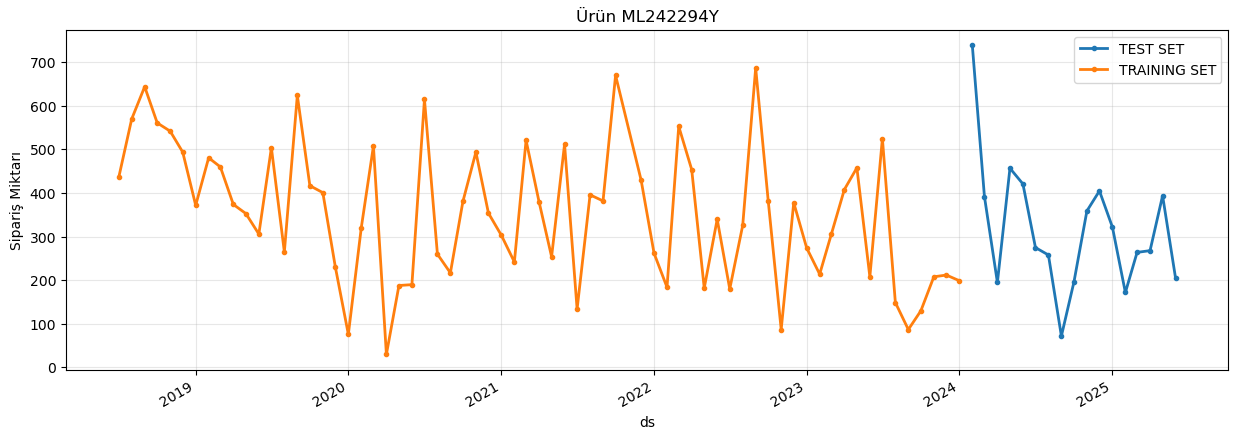

In [50]:
split_date = "2024-01-01"
train = df_monthly_yaygın_filtered.loc[df_monthly_yaygın_filtered["ds"] <= split_date].copy()
test  = df_monthly_yaygın_filtered.loc[df_monthly_yaygın_filtered["ds"] >  split_date].copy()

train["y"] = train["y"].fillna(0)
test["y"]  = test["y"].fillna(0)
ax = (
    test.set_index("ds").rename(columns={"y": "TEST SET"})
        .join(
            train.set_index("ds").rename(columns={"y": "TRAINING SET"}),
            how="outer"
        )
        .sort_index()
        .plot(figsize=(15,5), title=f"Ürün {urun_kodu}", style='.-', linewidth=2, markersize=6)
)
ax.set_ylabel("Sipariş Miktarı")
ax.grid(True, alpha=0.3)


In [55]:


model = Prophet(
   
    interval_width=0.0,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode="additive"
)
model.add_seasonality(
    name='6 month',
    period=180,
    fourier_order=1
    
)

# Train set ile eğit
model.fit(train)


15:13:58 - cmdstanpy - INFO - Chain [1] start processing
15:13:58 - cmdstanpy - INFO - Chain [1] done processing


In [56]:
 forecast = model.predict(test)
forecast["yhat"] = forecast["yhat"].clip(lower=0)
forecast["yhat_lower"] = forecast["yhat_lower"].clip(lower=0)

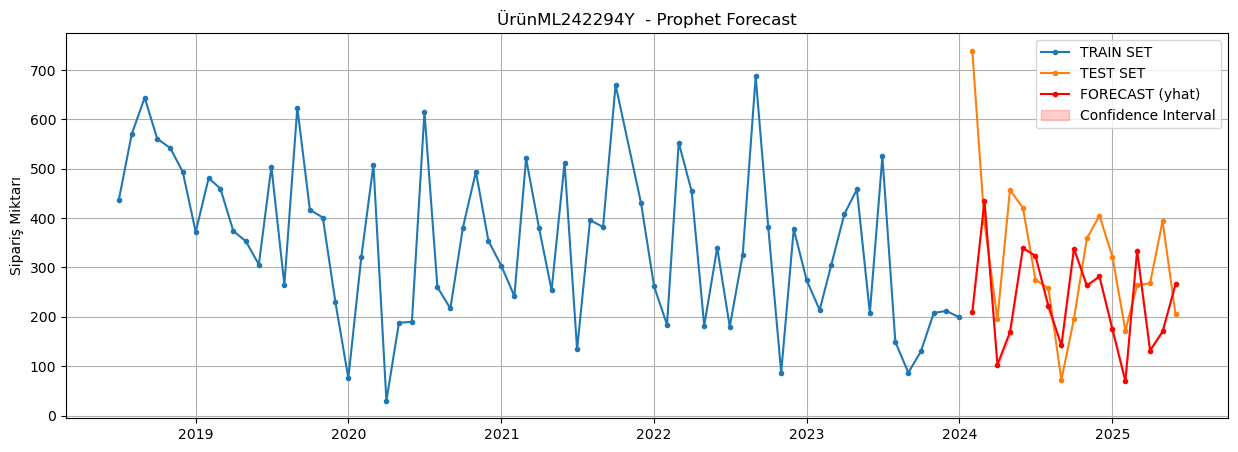

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(train["ds"], train["y"], ".-", label="TRAIN SET")
plt.plot(test["ds"], test["y"], ".-", label="TEST SET")
plt.plot(test["ds"], forecast["yhat"], "r.-", label="FORECAST (yhat)")  # tahmin
plt.fill_between(test["ds"], forecast["yhat_lower"], forecast["yhat_upper"], 
                 color="r", alpha=0.2, label="Confidence Interval")
plt.title(f"Ürün{urun_kodu}  - Prophet Forecast")
plt.ylabel("Sipariş Miktarı")
plt.legend()
plt.grid(True)
plt.show()

In [58]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import numpy as np
merged = test.merge(forecast[["ds", "yhat"]], on="ds", how="inner")

y_true = merged["y"]
y_pred = merged["yhat"]

# Metrikler
mae  = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# MAPE (0 değerlerden dolayı patlamasın diye filtreli)
mask = y_true != 0
mape = ( (y_true[mask] - y_pred[mask]).abs() / y_true[mask].abs() ).mean() * 100

# SMAPE
def smape(y_true, y_pred):
    return 100 * np.mean(
        2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-8)
    )

smape_val = smape(y_true, y_pred)

print("MAE :", mae)
print("RMSE:", rmse)
print("MAPE:", mape)
print("SMAPE:", smape_val)



MAE : 134.68006902193216
RMSE: 178.61865736639277
MAPE: 43.518476315787325
SMAPE: 50.25174124712407


### Extra Regressor(Tahminde Ekstra Değişken)

In [25]:
df_yaygın_merged["Malzeme"].value_counts().head(20)

Malzeme
QC000001     3570
R120P        2799
ML242294Y    2771
TM269101     2587
TM215102Y    2353
TM171125     2238
TM212113Y    2132
QC000001Y    2081
TM150218Y    1503
9604-02      1341
ML241485     1300
TM171123Y    1240
D1917870     1201
MC375615Y    1164
TY260313Y    1147
SB253104Y    1134
TM253102Y    1111
9206-03Y     1110
HD152631Y    1103
HD152630Y    1092
Name: count, dtype: int64

In [28]:
urun_kodu = "ML242294Y"
urun_df = df_yaygın_merged[df_yaygın_merged["Malzeme"] == urun_kodu].copy()

df_monthly_yaygın = (
    urun_df
      .groupby(urun_df["Yaratma tarihi"].dt.to_period("M"))["Sipariş miktarı"]  
      .sum()
      .to_timestamp()      
      .reset_index()
      .rename(columns={"Yaratma tarihi": "ds", "Sipariş miktarı": "y"})  
)

df_monthly_yaygın = (
    df_monthly_yaygın
      .set_index("ds")
      .asfreq("MS", fill_value=0)   
      .reset_index()
)


In [29]:

df_monthly_yaygın_filtered = df_monthly_yaygın[
    (df_monthly_yaygın["y"] >= 10) & (df_monthly_yaygın["y"] <= 800)
].copy()

print("Orijinal gözlem sayısı:", len(df_monthly_yaygın))
print("Filtrelenmiş gözlem sayısı:", len(df_monthly_yaygın_filtered))

Orijinal gözlem sayısı: 84
Filtrelenmiş gözlem sayısı: 83


### Tüfe

In [30]:
tüfe

,ds,tüfe yıllık
0,2025-07-01,33.52
1,2025-06-01,35.05
2,2025-05-01,35.41
3,2025-04-01,37.86
4,2025-03-01,38.10
...,...,...
86,2018-05-01,12.15
87,2018-04-01,10.85
88,2018-03-01,10.23
89,2018-02-01,10.26


In [31]:
df_tüfe = tüfe.copy()


df_tüfe["ds"] = pd.to_datetime(df_tüfe["ds"], dayfirst=True, errors="coerce")



df_tüfe["tüfe yıllık"] = pd.to_numeric(df_tüfe["tüfe yıllık"], errors="coerce")




In [32]:
df_monthly_yaygın_filtered

,ds,y
0,2018-07-01,436.0
1,2018-08-01,570.0
2,2018-09-01,644.0
3,2018-10-01,561.0
4,2018-11-01,542.0
...,...,...
79,2025-02-01,172.0
80,2025-03-01,264.0
81,2025-04-01,268.0
82,2025-05-01,394.0


In [33]:
df_prophet_2 = df_monthly_yaygın_filtered.merge(df_tüfe, on="ds", how="left")
df_prophet_2


,ds,y,tüfe yıllık
0,2018-07-01,436.0,15.85
1,2018-08-01,570.0,17.90
2,2018-09-01,644.0,24.52
3,2018-10-01,561.0,25.24
4,2018-11-01,542.0,21.62
...,...,...,...
78,2025-02-01,172.0,39.05
79,2025-03-01,264.0,38.10
80,2025-04-01,268.0,37.86
81,2025-05-01,394.0,35.41


### Holiday(kampanya)

In [34]:
otob_kampanya["Malzeme"].value_counts()

Malzeme
QC000001        69
ML242294Y       64
TM181148        62
ML242294        61
0821 302 080    60
                ..
NK550197Y        1
NK550196Y        1
NK550130Y        1
NK316108Y        1
NK275110Y        1
Name: count, Length: 4783, dtype: int64

In [87]:
otob_kampanya[otob_kampanya["Malzeme"]==urun_kodu]

,Müşteri,KşTü,Koşul türü,Unnamed: 3,Unnamed: 4,Malzeme,Malzeme.1,Tutar,Birim,Brm.,ÖB,Bşl.tarihi,Gçrl.sonu,Müşteri adı
362,600022.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,ML242294Y,"FILTRE,HAVA",-10.000,%,NaN,NaN,2025-04-30,2025-05-05 00:00:00,AŞKAR OTO ELEK.YED.PAR.İTH. İHR.
2172,600023.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,ML242294Y,"FILTRE,HAVA",-3.000,%,NaN,NaN,2018-02-06,2018-02-06 00:00:00,ATASER OTOM.SAN.VE TİC.LTD.ŞTİ
2173,600023.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,ML242294Y,"FILTRE,HAVA",-3.000,%,NaN,NaN,2018-02-07,2018-02-07 00:00:00,ATASER OTOM.SAN.VE TİC.LTD.ŞTİ
2174,600023.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,ML242294Y,"FILTRE,HAVA",-2.000,%,NaN,NaN,2020-10-20,2020-10-20 00:00:00,ATASER OTOM.SAN.VE TİC.LTD.ŞTİ
2175,600023.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,ML242294Y,"FILTRE,HAVA",-2.000,%,NaN,NaN,2021-03-04,2021-03-04 00:00:00,ATASER OTOM.SAN.VE TİC.LTD.ŞTİ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15232,601138.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,ML242294Y,"FILTRE,HAVA",-3.980,%,NaN,NaN,2025-02-18,2025-02-19 00:00:00,KARSAL OTOMOTİV TİC.LTD.ŞTİ.
15233,601138.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,ML242294Y,"FILTRE,HAVA",-4.000,%,NaN,NaN,2025-06-16,2025-06-17 00:00:00,KARSAL OTOMOTİV TİC.LTD.ŞTİ.
15821,601143.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,ML242294Y,"FILTRE,HAVA",-5.000,%,NaN,NaN,2023-07-24,2023-09-24 00:00:00,MAPAR OTOMOTİV
16008,601148.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,ML242294Y,"FILTRE,HAVA",-4.999,%,NaN,NaN,2024-03-06,2024-03-15 00:00:00,MUSFAR OTOMOTİV ANONİM ŞİRKETİ


In [35]:


kampanya_urun = otob_kampanya[otob_kampanya["Malzeme"] == urun_kodu].copy()
kampanya_urun["ds"] = pd.to_datetime(kampanya_urun["Bşl.tarihi"]).dt.to_period("M").dt.to_timestamp()


kampanya_df = kampanya_urun[["ds"]].drop_duplicates().copy()
kampanya_df["kampanya"] = 1   



In [36]:
df_prophet_2 = df_prophet_2.merge(kampanya_df, on="ds", how="left")
df_prophet_2["kampanya"] = df_prophet_2["kampanya"].fillna(0).astype(int)



In [37]:
df_prophet_2["kampanya"].value_counts()

kampanya
0    48
1    35
Name: count, dtype: int64

In [38]:
df_prophet_2

,ds,y,tüfe yıllık,kampanya
0,2018-07-01,436.0,15.85,1
1,2018-08-01,570.0,17.90,0
2,2018-09-01,644.0,24.52,0
3,2018-10-01,561.0,25.24,1
4,2018-11-01,542.0,21.62,0
...,...,...,...,...
78,2025-02-01,172.0,39.05,1
79,2025-03-01,264.0,38.10,1
80,2025-04-01,268.0,37.86,1
81,2025-05-01,394.0,35.41,1


### Dolar 

In [39]:
df_fin = dolar.copy()

# Tarih
df_fin["ds"] = pd.to_datetime(df_fin["Tarih"], dayfirst=True, errors="coerce")

# "Şimdi" kolonunu stringe çevir → virgül ve noktaları düzelt
df_fin["simdi"] = (
    df_fin["Şimdi"]
    .astype(str)
    .str.replace(".", "", regex=False)   # binlik ayırıcı noktaları sil
    .str.replace(",", ".", regex=False)  # ondalık virgülü noktaya çevir
)

# Float'a çevir
df_fin["simdi"] = pd.to_numeric(df_fin["simdi"], errors="coerce")

# Sadece gerekli kolonlar
df_fin = df_fin[["ds", "simdi"]]
df_fin

,ds,simdi
0,2025-08-25,40.9970
1,2025-08-24,40.9597
2,2025-08-22,40.9357
3,2025-08-21,40.9340
4,2025-08-20,40.9277
...,...,...
1975,2018-01-31,3.7543
1976,2018-01-30,3.7800
1977,2018-01-29,3.7924
1978,2018-01-26,3.7520


In [40]:

df_prophet_2["ds"] = pd.to_datetime(df_prophet_2["ds"])
df_fin["ds"] = pd.to_datetime(df_fin["ds"])


df_fin["ds"] = df_fin["ds"].dt.to_period("M").dt.to_timestamp()


df_fin = df_fin.groupby("ds", as_index=False).mean()

df_prophet_2 = df_prophet_2.merge(df_fin, on="ds", how="left")


In [41]:
df_prophet_2 

,ds,y,tüfe yıllık,kampanya,simdi
0,2018-07-01,436.0,15.85,1,4.774873
1,2018-08-01,570.0,17.90,0,5.921517
2,2018-09-01,644.0,24.52,0,6.305245
3,2018-10-01,561.0,25.24,1,5.806583
4,2018-11-01,542.0,21.62,0,5.345095
...,...,...,...,...,...
78,2025-02-01,172.0,39.05,1,36.174845
79,2025-03-01,264.0,38.10,1,37.042552
80,2025-04-01,268.0,37.86,1,38.082168
81,2025-05-01,394.0,35.41,1,38.805068


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
split_date = "2024-01-01"


train = df_prophet_2[df_prophet_2["ds"] <= split_date].copy()
test  = df_prophet_2[df_prophet_2["ds"] >  split_date].copy()




print(train.tail(), "\n\n", test.head())


           ds      y  tüfe yıllık  kampanya      simdi
61 2023-09-01   87.0        61.53         0  26.954248
62 2023-10-01  130.0        61.36         0  27.849973
63 2023-11-01  208.0        61.98         1  28.620441
64 2023-12-01  212.0        64.77         1  29.060114
65 2024-01-01  199.0        64.86         0  30.035504 

            ds      y  tüfe yıllık  kampanya      simdi
66 2024-02-01  739.0        67.07         0  30.750438
67 2024-03-01  392.0        68.50         1  32.002076
68 2024-04-01  195.0        69.80         0  32.299227
69 2024-05-01  457.0        75.45         0  32.226878
70 2024-06-01  421.0        71.60         0  32.542965


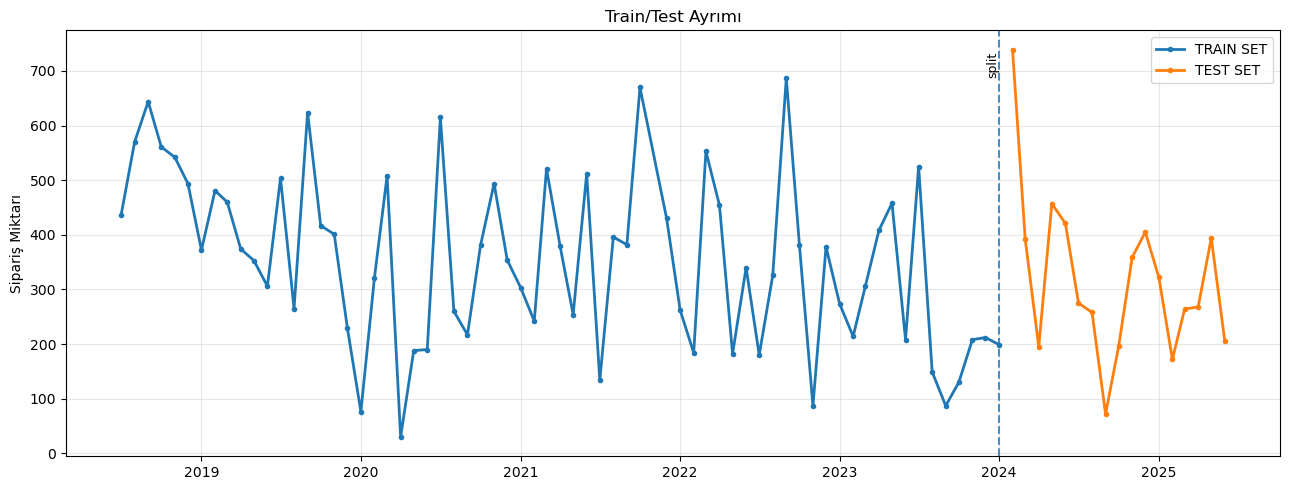

In [43]:
import pandas as pd
import matplotlib.pyplot as plt


train = train.copy().sort_values("ds")
test  = test.copy().sort_values("ds")
train["ds"] = pd.to_datetime(train["ds"])
test["ds"]  = pd.to_datetime(test["ds"])

plt.figure(figsize=(13,5))


plt.plot(train["ds"], train["y"], ".-", linewidth=2, markersize=6, label="TRAIN SET")


plt.plot(test["ds"],  test["y"],  ".-", linewidth=2, markersize=6, label="TEST SET")


split_dt = pd.to_datetime(split_date)
plt.axvline(x=split_dt, linestyle="--", linewidth=1.5, alpha=0.8)
plt.text(split_dt, plt.ylim()[1]*0.95, "split", rotation=90, va="top", ha="right", fontsize=9)

plt.title("Train/Test Ayrımı")
plt.ylabel("Sipariş Miktarı")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


In [44]:
train["tüfe yıllık"] = train["tüfe yıllık"].fillna(0)


In [45]:

m = Prophet(yearly_seasonality=True, seasonality_mode="additive")


m.add_regressor("simdi")
m.add_regressor("tüfe yıllık")
m.add_regressor("kampanya")



train_cols = ["ds","y","simdi","tüfe yıllık","kampanya"]
m.fit(train[train_cols])


future_test = test[["ds"]].merge(df_prophet_2[["ds","simdi","tüfe yıllık","kampanya"]], on="ds", how="left")



forecast_test = m.predict(future_test)[["ds","yhat","yhat_lower","yhat_upper"]]

forecast_test[["yhat","yhat_lower","yhat_upper"]] = (
    forecast_test[["yhat","yhat_lower","yhat_upper"]].clip(lower=0)
)


15:06:51 - cmdstanpy - INFO - Chain [1] start processing
15:06:51 - cmdstanpy - INFO - Chain [1] done processing


In [46]:

merged = (
    test[["ds","y"]]
    .merge(forecast_test[["ds","yhat"]], on="ds", how="inner")
    .dropna(subset=["y","yhat"])
)



from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import numpy as np

y_true = merged["y"].astype(float).values
y_pred = merged["yhat"].astype(float).values

mae  = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = mean_absolute_percentage_error(y_true, y_pred) * 100

def smape(a, f):
    return 100 * np.mean(2*np.abs(f-a) / (np.abs(a)+np.abs(f)+1e-8))

print("MAE :", mae)
print("yüzde MAE :", mae/test["y"].mean())
print("RMSE:", rmse)
print("MAPE:", mape)
print("SMAPE:", smape(y_true, y_pred))



MAE : 158.73419251483313
yüzde MAE : 0.500274614896582
RMSE: 206.43339727361527
MAPE: 45.42878427604921
SMAPE: 63.6704664554234


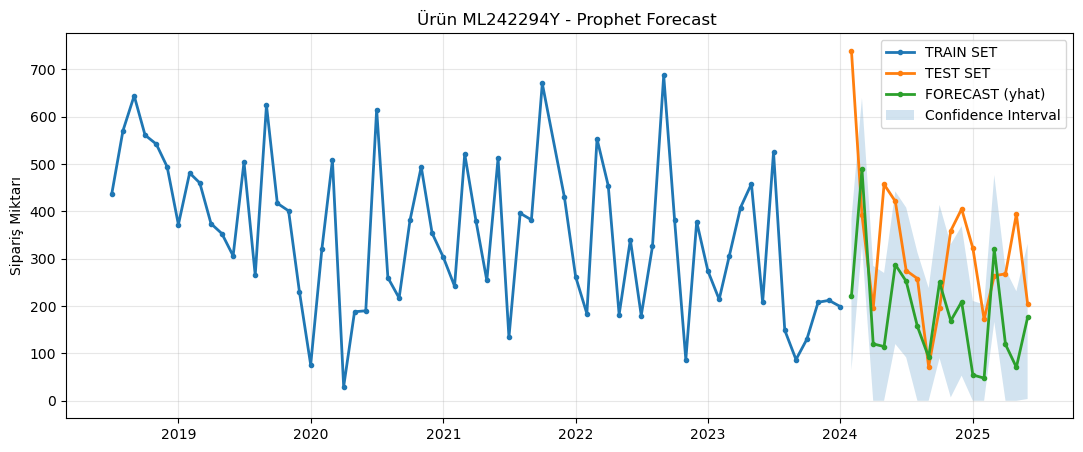

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,5))


plt.plot(train["ds"], train["y"], ".-", linewidth=2, markersize=6, label="TRAIN SET")


plt.plot(test["ds"], test["y"], ".-", linewidth=2, markersize=6, label="TEST SET")


plt.plot(forecast_test["ds"], forecast_test["yhat"], ".-", linewidth=2, markersize=6, label="FORECAST (yhat)")


plt.fill_between(
    forecast_test["ds"],
    forecast_test["yhat_lower"],
    forecast_test["yhat_upper"],
    alpha=0.2, label="Confidence Interval"
)

plt.title(f"Ürün {urun_kodu} - Prophet Forecast ")
plt.ylabel("Sipariş Miktarı")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()



### Her Ayın Bireysel Sapması

In [56]:

merged = (
    test[["ds","y"]]
    .merge(forecast_test[["ds","yhat"]], on="ds", how="inner")
    .dropna(subset=["y","yhat"])
)


merged["sapma_%"] = 100 * (merged["yhat"] - merged["y"]) / merged["y"].replace(0, np.nan)


print(merged[["ds","y","yhat","sapma_%"]])


           ds      y        yhat    sapma_%
0  2024-02-01  247.0  289.784505  17.321662
1  2024-03-01  260.0  313.664435  20.640167
2  2024-04-01  490.0  221.051929 -54.887361
3  2024-05-01  375.0  289.219366 -22.874836
4  2024-06-01  390.0  302.540848 -22.425423
5  2024-07-01  307.0  330.562715   7.675152
6  2024-08-01  330.0  250.657941 -24.043048
7  2024-09-01  584.0  256.080115 -56.150665
8  2024-10-01  267.0  247.252857  -7.395934
9  2024-11-01  220.0  277.661832  26.209924
10 2024-12-01  368.0  405.176531  10.102318
11 2025-01-01  334.0  230.809725 -30.895292
12 2025-02-01  408.0  296.272550 -27.384179
13 2025-03-01  203.0  277.034457  36.470176
14 2025-04-01  362.0  303.537397 -16.149890
15 2025-05-01  341.0  338.757554  -0.657609
16 2025-06-01  433.0  341.275822 -21.183413
